## loss

In [1]:
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt

In [50]:
all_review_log = pd.read_csv('./log.csv', sep=';')

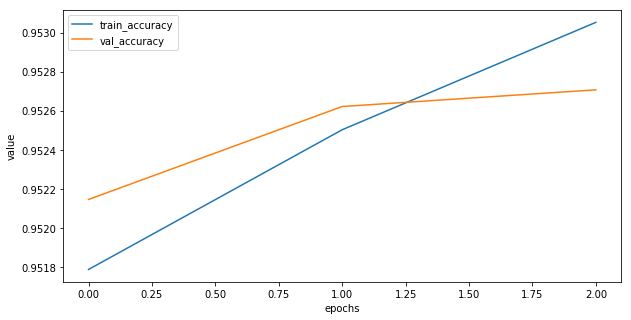

In [51]:
plt.figure(figsize=(10,5))

train_accuracy, = plt.plot(all_review_log['epoch'], all_review_log['acc'], label='train_accuracy')
val_accuracy, = plt.plot(all_review_log['epoch'], all_review_log['val_acc'], label='val_accuracy')

plt.xlabel('epochs')
plt.ylabel('value')

plt.legend([train_accuracy, val_accuracy], ['train_accuracy', 'val_accuracy'])

plt.show()

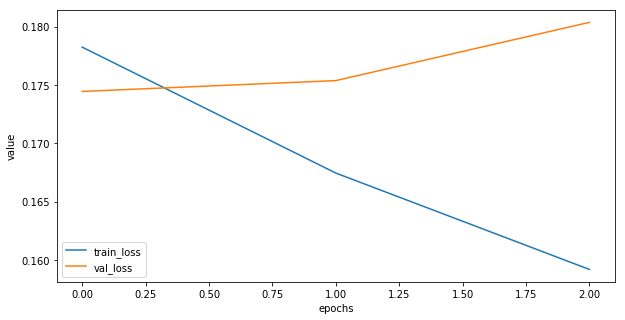

In [52]:
plt.figure(figsize=(10,5))

train_loss, = plt.plot(all_review_log['epoch'], all_review_log['loss'], label='train_loss')
val_loss, = plt.plot(all_review_log['epoch'], all_review_log['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('value')

plt.legend([train_loss, val_loss], ['train_loss', 'val_loss'])

plt.show()

## load epoch

In [60]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [6]:
from keras.models import load_model

/home/sixun/miniconda2/envs/py35keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [53]:
%%time
model = load_model('nn-classify-01-0.17444.hdf5')

CPU times: user 1.03 s, sys: 578 ms, total: 1.61 s
Wall time: 1.77 s


## load test

In [54]:
import scipy.sparse as sp

In [55]:
%%time
x = sp.load_npz('./preliminary_contest_data/test_x.npz')

CPU times: user 8.46 s, sys: 1.95 s, total: 10.4 s
Wall time: 10.8 s


In [56]:
x.shape

(2265989, 419652)

## predict

In [57]:
from util import ShowProcess
import numpy as np

In [ ]:
%%time
batch_size = 4096
number_of_batches = x.shape[0] // batch_size

show = ShowProcess(number_of_batches)

y_prob_predict = []
for b in range(number_of_batches):
    # if at the last batch, using the remaining test data
    if (b + 1) == number_of_batches:
        x_batch = x[batch_size * b:].toarray()
    else:
        x_batch = x[batch_size * b: batch_size * (b + 1)].toarray()
    
    y_prob = model.predict_on_batch(x_batch).tolist()
    y_prob_predict += y_prob
    
    show.show_process()
show.close()

In [23]:
%%time
y_prob_predict_array = np.array(y_prob_predict)
y_prob_predict_array = y_prob_predict_array.flatten()

CPU times: user 912 ms, sys: 30.7 ms, total: 943 ms
Wall time: 872 ms


In [42]:
%%time
y_prob_predict_array = np.around(y_prob_predict_array, decimals=8)

CPU times: user 392 ms, sys: 218 ms, total: 611 ms
Wall time: 200 ms


## load test user, item

In [43]:
test_user_item_df = pd.read_csv('./preliminary_contest_data/test1.csv')

In [44]:
test_user_item_df['score'] = pd.Series(y_prob_predict_array)

In [45]:
%%time
test_user_item_df.to_csv('./preliminary_contest_data/submission.csv', index=False)

CPU times: user 10.3 s, sys: 98.5 ms, total: 10.4 s
Wall time: 10.3 s


In [32]:
a = pd.read_csv('./submission.csv')

In [34]:
a.shape

(4531978, 3)

In [48]:
test_user_item_df.shape

(2265989, 3)

In [49]:
test_user_item_df.head()

,aid,uid,score
0,2118,64355836,0.032070
1,692,45051997,0.025183
2,692,10869198,0.031286
3,1918,75929554,0.024244
4,1596,5790162,0.321236
